<a href="https://colab.research.google.com/github/Christina-26/Marvel-Level--2-Task/blob/main/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensembling is a the technique to combine several individual predictive models to come up with the final predictive model such as Maximum voting, Averaging, Weighted Averaging, and Rank Averaging.
The various types of ensemble techniques are:
1. Voting
2. Bootstrap aggregation
3. Random Forest
4. Boosting
5. Blending
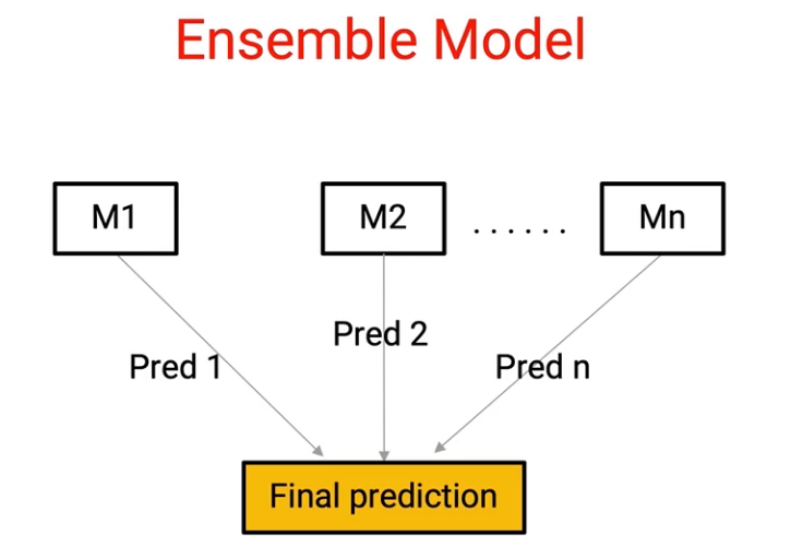

In [24]:
import pandas as pd
import numpy as np
import statistics
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
%matplotlib inline

In [25]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
test_id = test['PassengerId']
combine = [train, test] # combine train and test data, easy to do data manipulation

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
titanic_df=train
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
for df in combine: # add feature 'FamilySize'
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
trans1=combine[0]
trans1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [29]:
for df in combine: # add feature 'Alone'
    df['Alone'] = 0
    df.loc[df['FamilySize'] == 1, 'Alone'] = 1
trans2=combine[0]
trans2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [30]:
for df in combine: # fill missing values for 'Embarked'
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
trans3=combine[0]
print(trans3.info())
trans3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Alone        891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [31]:
for df in combine: # fill missing values for 'Fare' and transform into categorical feature
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['farecat'] = 0
    df.loc[df['Fare'] <= 10.5, 'farecat'] = 0
    df.loc[(df['Fare'] > 10.5) & (df['Fare'] <= 21.679), 'farecat'] = 1
    df.loc[(df['Fare'] > 21.679) & (df['Fare'] <= 39.688), 'farecat'] = 2
    df.loc[(df['Fare'] > 39.688) & (df['Fare'] <= 512.329), 'farecat'] = 3
    df.loc[df['Fare'] > 512.329, 'farecat'] = 4

trans4=combine[0]
trans4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Alone        891 non-null    int64  
 14  farecat      891 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 104.5+ KB


In [32]:
for df in combine: # fill missing values for 'Age' and transform into categorical feature
    avg = df['Age'].mean()
    std = df['Age'].std()
    NaN_count = df['Age'].isnull().sum()

    age_fill = np.random.randint(avg-std, avg+std, NaN_count)
    df.loc[df['Age'].isnull(), 'Age'] = age_fill
    df['Age'] = df['Age'].astype(int)

    df['agecat']=0
    df.loc[df['Age'] <= 16, 'agecat'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'agecat'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'agecat'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'agecat'] = 3
    df.loc[df['Age'] > 64, 'agecat'] = 4
trans5=combine[0]
trans5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Alone        891 non-null    int64  
 14  farecat      891 non-null    int64  
 15  agecat       891 non-null    int64  
dtypes: float64(1), int64(10), object(5)
memory usage: 111.5+ KB


In [33]:
import re
def only_title(name): # manipulation 'Name', extracting titles from names
    title = re.findall(' ([A-Za-z]+)\.', name)
    if title:
        return title[0]

for df in combine:
    df['Title'] = df['Name'].apply(only_title)

for df in combine:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major',
                                     'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

############ Encoding features, make them ready for classifiers
# feature_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
# for df in combine:
#     df.drop(feature_drop, axis=1, inplace=True)

trans6=combine[0]
trans6.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,farecat,agecat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,2,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,0,3,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2,0,3,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,1,0,2,Mr


In [34]:
for df in combine: # add feature 'Alone'
    df['gender'] = 0
    df.loc[df['Sex'] == "male", 'gender'] = 1
trans6=combine[0]

In [35]:
trans6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Alone        891 non-null    int64  
 14  farecat      891 non-null    int64  
 15  agecat       891 non-null    int64  
 16  Title        891 non-null    object 
 17  gender       891 non-null    int64  
dtypes: float64(1), int64(11), object(6)
memory usage: 

**ENSEMBLE STACKING METHOD**

In [36]:
def accuracy(k,prediction):
    match=0
    i=0
    for x in prediction:
        if x==k[i]:
            match+=1
        i+=1
    return(match/k.size)

In [37]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
X  = train[['gender','Pclass','agecat']]
X1 = test[['gender','Pclass','agecat']]
Y = train[['Survived']]
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X,Y)
pred1 = clf1.predict(X)
tpred1 = clf1.predict(X1)
k=np.array(Y)
print(accuracy(k,pred1))

0.8035914702581369


In [38]:
X  = train[['gender','Pclass','farecat',]]
X2 = test[['gender','Pclass','farecat',]]
Y = train[['Survived']]
X.insert(1, 'pred1', pd.DataFrame({"pread1":pred1}))
X2.insert(1, 'pred1', pd.DataFrame({"pread1":tpred1}))
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X,Y)
pred2 = clf2.predict(X)
tpred2 = clf2.predict(X2)
print(accuracy(k,pred2))

0.8215488215488216


In [39]:
X  = train[['gender','Pclass','farecat','FamilySize']]
X3 = test[['gender','Pclass','farecat','FamilySize']]
Y = train[['Survived']]
clf3=RandomForestClassifier(n_estimators=100)
clf3.fit(X,Y)
pred3=clf3.predict(X)
tpred3 = clf3.predict(X3)
print(accuracy(k,pred3))

0.8305274971941639


<ipython-input-39-28c7c2c28a9a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf3.fit(X,Y)


In [40]:
X  = train[['gender','FamilySize','agecat','Pclass']]
Y = train[['Survived']]
X4 = test[['gender','FamilySize','agecat','Pclass']]
clf4=RandomForestClassifier(n_estimators=1000)
clf4.fit(X,Y)
pred4=clf4.predict(X)
tpred4=clf4.predict(X4)
print(accuracy(k,pred4))

<ipython-input-40-2e329f630105>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf4.fit(X,Y)


0.8361391694725028


In [41]:
from sklearn import linear_model
X  = train[['gender','FamilySize','agecat','Pclass','Parch','SibSp','Fare']]
Y = train[['Survived']]
X5=test[['gender','FamilySize','agecat','Pclass','Parch','SibSp','Fare']]
reg = linear_model.LinearRegression()
reg.fit(X,Y)
pred5=reg.predict(X)
tpred5=reg.predict(X5)
print(accuracy(k,pred5))

0.0


In [42]:
from sklearn.linear_model import LogisticRegression
X  = train[['gender','FamilySize','agecat','Pclass','Parch','SibSp','Fare']]
Y = train[['Survived']]
X6=test[['gender','FamilySize','agecat','Pclass','Parch','SibSp','Fare']]
lreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
lreg.fit(X,Y)
pred6=lreg.predict(X)
tpred6=lreg.predict(X5)
print(accuracy(k,pred6))

0.7912457912457912


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
arr=[]
for i in pred5:
    arr=arr+ [i]
print(accuracy(pred1,pred2))
print(accuracy(pred1,pred3))
print(accuracy(pred1,pred4))
print(accuracy(pred1,pred6))
print(accuracy(pred2,pred3))
print(accuracy(pred2,pred4))
print(accuracy(pred2,pred6))
print(accuracy(pred3,pred4))
print(accuracy(pred3,pred6))
print(accuracy(pred4,pred6))

0.9640852974186308
0.9259259259259259
0.920314253647587
0.9270482603815937
0.9528619528619529
0.9270482603815937
0.9248035914702581
0.9270482603815937
0.9158249158249159
0.8967452300785634


In [44]:
totalcalc=[]
for i in range(0,len(pred1)):
    a1=pred1[i]
    a1+=pred2[i]*2**1
    a1+=pred3[i]*2**2
    a1+=pred4[i]*2**3
    a1+=pred6[i]*2**4
    totalcalc+=[a1]

In [45]:
np.array(set(totalcalc))

array({0, 1, 3, 4, 6, 8, 11, 12, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31},
      dtype=object)

In [46]:
arrx0=[0 for i in range(0,32)]
arrx1=[0 for i in range(0,32)]
for i in range(0,len(totalcalc)):
    if k[i]==1:
        arrx1[totalcalc[i]]+=1
    else:
        arrx0[totalcalc[i]]+=1

arrxf=[0 for i in range(0,32)]
for i in range(0,32):
    if arrx1[i]>arrx0[i]:
        arrxf[i]=1
    else:
        arrxf[i]=0

In [47]:
for i in range(0,32):
    print(i,"\t",arrx1[i],"\t",arrx0[i])

0 	 70 	 449
1 	 1 	 10
2 	 0 	 0
3 	 0 	 1
4 	 6 	 2
5 	 0 	 0
6 	 4 	 3
7 	 0 	 0
8 	 10 	 4
9 	 0 	 0
10 	 0 	 0
11 	 6 	 0
12 	 2 	 0
13 	 0 	 0
14 	 2 	 0
15 	 5 	 0
16 	 9 	 20
17 	 0 	 3
18 	 0 	 0
19 	 2 	 8
20 	 0 	 0
21 	 1 	 1
22 	 2 	 1
23 	 8 	 8
24 	 1 	 2
25 	 0 	 1
26 	 0 	 0
27 	 3 	 2
28 	 4 	 2
29 	 1 	 1
30 	 0 	 1
31 	 205 	 30


In [48]:
trtotalcalc=[]
for i in range(0,len(pred1)):
    a1=pred1[i]
    a1+=pred2[i]*2**1
    a1+=pred3[i]*2**2
    a1+=pred4[i]*2**3
    a1+=pred6[i]*2**4
    trtotalcalc+=[arrxf[a1]]
accuracy(k,trtotalcalc)

0.8462401795735129

In [49]:
ttotalcalc=[]
for i in range(0,len(tpred1)):
    a1=tpred1[i]
    a1+=tpred2[i]*2**1
    a1+=tpred3[i]*2**2
    a1+=tpred4[i]*2**3
    a1+=tpred6[i]*2**4
    ttotalcalc+=[arrxf[a1]]

**RESULTS AFTER STACKING**

In [50]:
print(accuracy(pred1,trtotalcalc))
print(accuracy(pred2,trtotalcalc))
print(accuracy(pred3,trtotalcalc))
print(accuracy(pred4,trtotalcalc))
print(accuracy(pred6,trtotalcalc))

0.9012345679012346
0.9349046015712682
0.9483726150392817
0.9719416386083053
0.8754208754208754


In [51]:
dummy_data1 = {
        'pred1': pred1,
        'pred2': pred2,
        'pred3':pred3,
        'pred4':pred4,
        #'pred5':arr
        }

df1 = pd.DataFrame(dummy_data1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df1,Y)

In [52]:
predt=clf.predict(df1)
print(accuracy(k,predt))

0.8439955106621774
